In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import metrics

In [2]:
# Importing the dataset
data = pd.read_csv('dummy.csv')
print("Input Data and Shape")
print(data.shape)
data.head()
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values

Input Data and Shape
(3000, 2)


In [3]:
f1

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

In [4]:
f2

array([ -3.241693,  15.78481 ,   7.319176, ..., -10.50136 , -12.25584 ,
       -24.87731 ])

In [5]:
X = np.array(list(zip(f1, f2)))
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

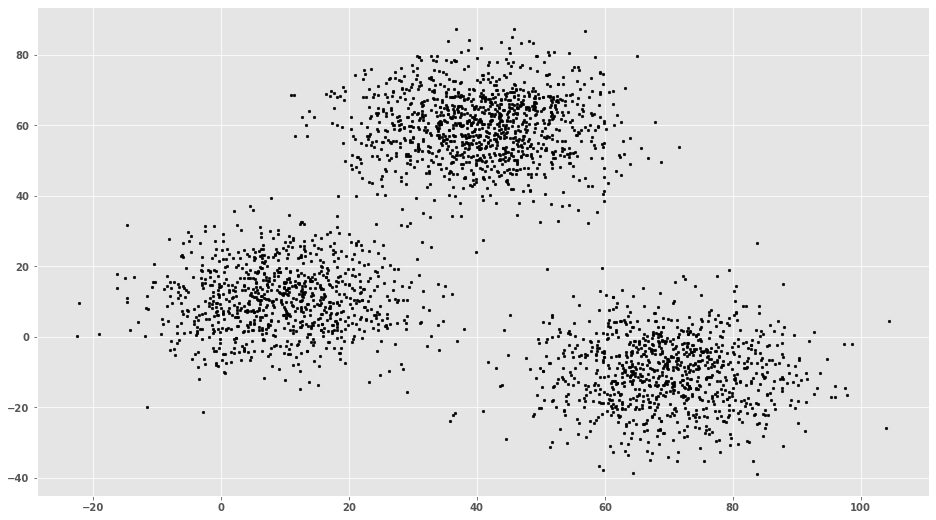

In [6]:
plt.scatter(f1, f2, c='black', s=7)

In [7]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,5.030433e+06
1,2,2.309985e+06
2,3,6.116059e+05
3,4,5.359456e+05
4,5,4.740092e+05
5,6,4.092198e+05
6,7,3.586191e+05
7,8,3.151185e+05
8,9,2.936024e+05
9,10,2.511301e+05


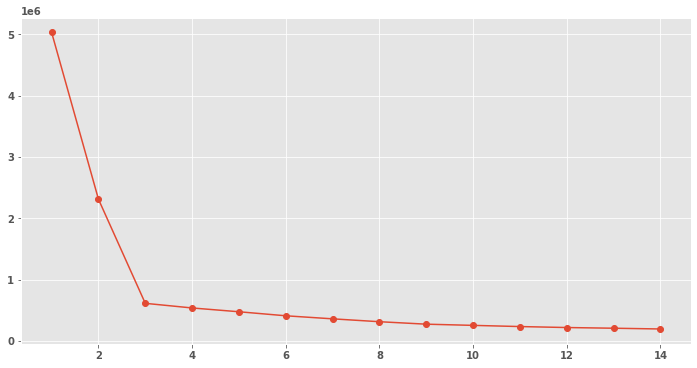

In [8]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [8]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


In [9]:
colnames = ["col1", "col2"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [11]:
X_df.tail(50)

,col1,col2,group
2950,71.53534,0.862379,2
2951,76.21033,7.055012,2
2952,63.84636,-17.728300,2
2953,66.25222,-3.913034,2
2954,81.44768,-24.247570,2
2955,62.67937,-20.088210,2
2956,54.33532,1.649464,2
2957,75.66274,-15.758750,2
2958,80.03555,-14.611740,2
2959,60.50964,-18.805880,2


In [12]:
X_df['group'].value_counts()

0    1149
1     952
2     899
Name: group, dtype: int64

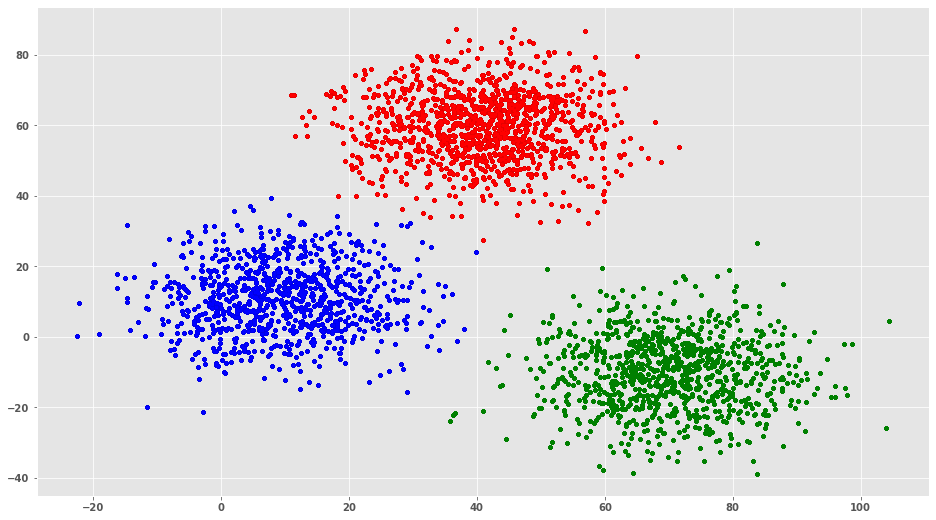

In [13]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])
for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

array([[<AxesSubplot:title={'center':'col1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'col2'}, xlabel='[group]'>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

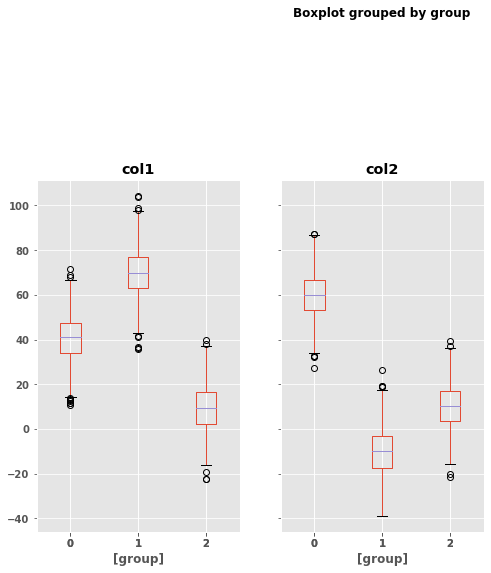

In [14]:
import matplotlib.pylab as plt
X_df.boxplot(by = 'group',  layout=(4,3), figsize=(12, 30))